# **VGG16**

In [9]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print("Done!!!")

Done!!!


load data path

In [10]:
base_dir = r'D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# train directories
train_Blight_dir = os.path.join(train_dir, 'Blight')
train_Common_Rust_dir = os.path.join(train_dir, 'Common_Rust')
train_Gray_Leaf_Spot_dir = os.path.join(train_dir, 'Gray_Leaf_Spot')
train_Healthy_dir = os.path.join(train_dir, 'Healthy')

# validation directories
val_Blight_dir = os.path.join(validation_dir, 'Blight')
val_Common_Rust_dir = os.path.join(validation_dir, 'Common_Rust')
val_Gray_Leaf_Spot_dir = os.path.join(validation_dir, 'Gray_Leaf_Spot')
val_Healthy_dir = os.path.join(validation_dir, 'Healthy')

In [11]:
test_dir = os.path.join(base_dir, 'test')
print("Test Directory: ", test_dir)

Test Directory:  D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data\test


class names

**Make sure that the classes specified are all correspond to the alphabetic order of the folders**

```bash
dataset/test/
  class1/
  class2/
  class3/
```

so the class names should be like this:

``` python
class_names = ['class1', 'class2', 'class3']
```


In [12]:
class_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [13]:
print(train_dir)
print(validation_dir)

D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data\train
D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\datasets\processed_data\val


plot some pics

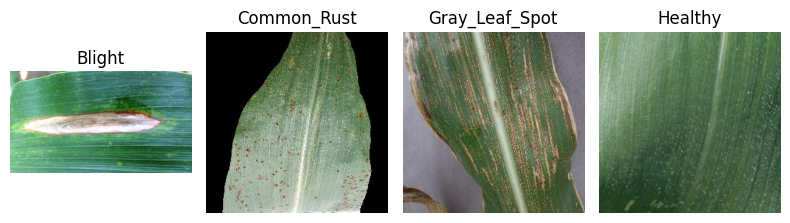

In [14]:
# List image files for each class
blight_images = os.listdir(train_Blight_dir)
common_rust_images = os.listdir(train_Common_Rust_dir)
gray_leaf_spot_images = os.listdir(train_Gray_Leaf_Spot_dir)
healthy_images = os.listdir(train_Healthy_dir)

pic_index = 100
def safe_get(images, idx):
    return images[idx] if len(images) > idx else images[0]

img_paths = [
    os.path.join(train_Blight_dir, safe_get(blight_images, pic_index)),
    os.path.join(train_Common_Rust_dir, safe_get(common_rust_images, pic_index)),
    os.path.join(train_Gray_Leaf_Spot_dir, safe_get(gray_leaf_spot_images, pic_index)),
    os.path.join(train_Healthy_dir, safe_get(healthy_images, pic_index))
]

nrows, ncols = 1, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 8))
axes = axes.flatten()
titles = class_names

for i, (img_path, title) in enumerate(zip(img_paths, titles)):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Prep Training and Validation Sets

In [15]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# set batch size and image size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# preprocess the data
train_dataset = image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

val_dataset = image_dataset_from_directory(
    validation_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

Found 2930 files belonging to 4 classes.
Found 837 files belonging to 4 classes.


create test data for further evaluation

In [16]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False  # Important: keeps label order aligned with predictions
)

Found 421 files belonging to 4 classes.


opti

In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Load the base model

In [18]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    include_top=False,
    weights='imagenet'
)

for layer in vgg16.layers:
    layer.trainable = False

Compile and Fit

In [19]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Flatten the output layer to 1 dimensio
x = vgg16.output
x = layers.Flatten()(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# add dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# add a final sigmoid layer for classification

predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=predictions)

In [20]:
# compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train the model

In [21]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 336s 4s/step - accuracy: 0.7484 - loss: 19.1646 - val_accuracy: 0.9068 - val_loss: 1.0338
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.9207 - loss: 0.7186 - val_accuracy: 0.9044 - val_loss: 0.6067
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.9448 - loss: 0.3732 - val_accuracy: 0.9068 - val_loss: 0.4461
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.9622 - loss: 0.2425 - val_accuracy: 0.9140 - val_loss: 0.4555
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9702 - loss: 0.1360 - val_accuracy: 0.9152 - val_loss: 0.4685
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.9639 - loss: 0.2192 - val_accuracy: 0.9164 - val_loss: 0.5844
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - accuracy: 0.9718 - loss: 0.1807 - val_accuracy: 0.9104 - val_loss: 0.6599
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.9669 - loss: 0.1643 - val_accuracy: 0.9200 - 

 Plot Training & Validation Accuracy and Loss

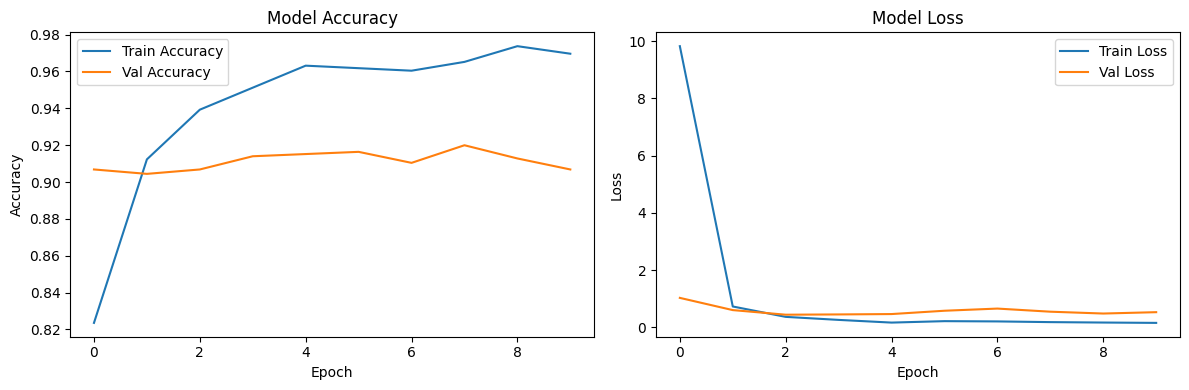

In [22]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


model sumary

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,257,550 (203.16 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,695,242 (98.02 MB)

save the model

In [ ]:
# model.save(r"D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\models\pre_trained_models\vgg16_custom.keras")

load model

In [1]:
from tensorflow.keras.models import load_model

model = load_model(r"D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\models\pre_trained_models\vgg16_custom.keras")

d:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Detection\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Confusion Matrix

In [31]:
import numpy as np

y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class index

14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step


In [32]:
y_true = np.concatenate([labels for _, labels in test_dataset], axis=0)

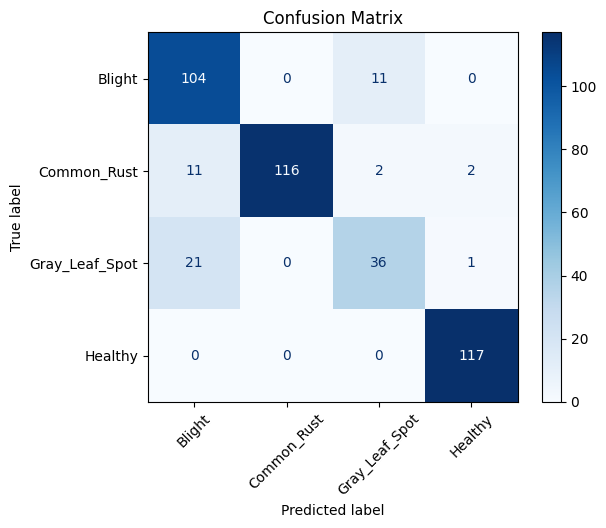

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))

                precision    recall  f1-score   support

        Blight       0.76      0.90      0.83       115
   Common_Rust       1.00      0.89      0.94       131
Gray_Leaf_Spot       0.73      0.62      0.67        58
       Healthy       0.97      1.00      0.99       117

      accuracy                           0.89       421
     macro avg       0.87      0.85      0.86       421
  weighted avg       0.89      0.89      0.89       421

